# Playground to experiment

In [1]:
import gensim
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import sys
sys.setrecursionlimit(10000)
from datetime import timedelta
import time

from birch import BIRCH
import kmeans
from pre_process import extract_mapped_doc2vecs, Doc2vec_wrapper

## Compute optimal minPts and eps value for DBSCAN

Using the heuristic suggested in Section 4.2 of the [DBSCAN paper](https://www.aaai.org/Papers/KDD/1996/KDD96-037.pdf).

In [2]:
from utils import compute_optimal_k_dists
def get_kdist_plot(data, k):
    kdists = sorted(compute_optimal_k_dists(data, k), reverse=True)
    #len(kdists)

    plt.plot(range(1, len(kdists) + 1), kdists, '-ro')
    return plt.show

### ETD docvectors

In [3]:
DOCVEC_PATH = '../obj/etd/doc2vec/abstracts_etd_doc2vec_all_docs30961_docs'

docvec_model = gensim.models.doc2vec.Doc2Vec.load(DOCVEC_PATH)

doc_vectors, keys = extract_mapped_doc2vecs(docvec_model)


# K-Dist crossvalidation

23140
Computing 3-dist for 23140th point
Time taken 4:27:26.272938s


Text(0.5, 1.0, 'DBSCAN Hyper-parameter Selection')

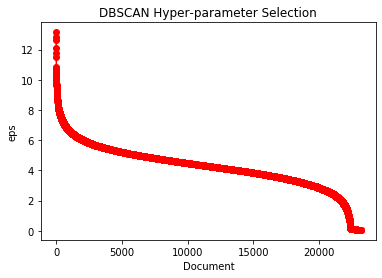

In [3]:
get_kdist_plot(np.array(doc_vectors), 3)
plt.xlabel('Document')
plt.ylabel('eps')
plt.title('DBSCAN Hyper-parameter Selection')

In [ ]:
get_kdist_plot(np.array(doc_vectors), 4)

In [ ]:
get_kdist_plot(np.array(doc_vectors), 5)

23140
Computing 8-dist for 23140th point
Time taken 1:14:34.074805s


<function matplotlib.pyplot.show(*args, **kw)>

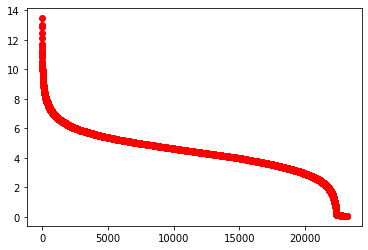

In [6]:
get_kdist_plot(np.array(doc_vectors), 8)

23140
Computing 10-dist for 23140th point
Time taken 1:15:22.164549s


<function matplotlib.pyplot.show(*args, **kw)>

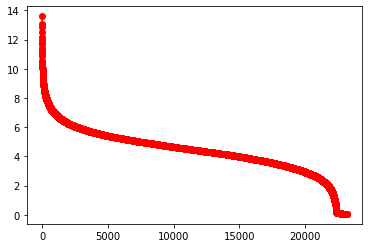

In [7]:
get_kdist_plot(np.array(doc_vectors), 10)

## BIRCH trials

In [6]:
data, keys = extract_mapped_doc2vecs(joblib.load('../obj/etd/doc2vec/abstracts_etd_doc2vec_all_docs30961_docs'))

birch_model = BIRCH(keys)

In [7]:
birch_model.fit(data)

In [14]:
birch_model.save('../obj/etd/birch/iter_1/birch_full_data_docvecs.sav')

In [8]:
birch_model.model.labels_

array([206, 206, 206, ..., 206, 303, 206])

In [10]:
[len([_ for _ in birch_model.model.labels_ if _ == idx]) for idx in range(500)]

[22,
 61,
 18,
 53,
 19,
 7,
 46,
 32,
 29,
 59,
 26,
 15,
 49,
 92,
 47,
 6,
 7,
 59,
 112,
 58,
 125,
 23,
 8,
 90,
 65,
 72,
 44,
 40,
 174,
 32,
 22,
 247,
 84,
 8,
 87,
 123,
 122,
 78,
 58,
 62,
 46,
 30,
 114,
 123,
 68,
 44,
 62,
 15,
 7,
 78,
 29,
 25,
 33,
 114,
 51,
 58,
 69,
 132,
 98,
 60,
 54,
 62,
 25,
 41,
 50,
 49,
 13,
 57,
 40,
 54,
 80,
 41,
 6,
 126,
 42,
 38,
 24,
 38,
 29,
 74,
 97,
 9,
 56,
 140,
 23,
 40,
 65,
 24,
 10,
 32,
 5,
 7,
 103,
 34,
 51,
 56,
 13,
 12,
 5,
 44,
 14,
 35,
 61,
 4,
 121,
 16,
 44,
 56,
 8,
 32,
 5,
 36,
 19,
 4,
 41,
 18,
 25,
 178,
 41,
 56,
 98,
 3,
 12,
 30,
 30,
 70,
 39,
 66,
 98,
 53,
 71,
 18,
 18,
 32,
 100,
 49,
 5,
 57,
 47,
 29,
 76,
 43,
 61,
 24,
 8,
 33,
 39,
 50,
 11,
 42,
 7,
 44,
 71,
 45,
 27,
 100,
 100,
 43,
 56,
 43,
 55,
 26,
 12,
 76,
 27,
 45,
 11,
 30,
 38,
 10,
 42,
 9,
 42,
 8,
 51,
 37,
 278,
 21,
 24,
 51,
 6,
 117,
 43,
 8,
 11,
 101,
 18,
 73,
 50,
 95,
 43,
 40,
 28,
 54,
 7,
 13,
 32,
 38,
 8,
 35,
 47,

# Compute Optimal cluster count based on Silhouette Coefficient

Cluster Nos: 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800

In [5]:
from sklearn.metrics import silhouette_score as s_score
import kmeans, dbscan, birch, agglo_clus
import time
from datetime import timedelta

## K-Means

In [7]:
t1 = time.monotonic()

for clus in [300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]:
    
    km_obj = kmeans.Kmeans(doc_list=keys, n_clusters=clus, init='k-means++', n_init=3, n_jobs=10, random_state=42, verbose=0, algorithm='full', iter_='3')

    km_obj.fit(doc_vectors)
    
    ordered_labels = [km_obj.km.labels_[km_obj.doc_list.index(uri)] for uri in keys]

    #km_obj.save('abstracts_etd_doc2doc_vectorsll_docs30961_docs_kmeans.sav')
    
    print("Silhouette Score for {} clusters is {}".format(clus, s_score(doc_vectors, ordered_labels)))

print("Time taken {}s".format(timedelta(time.monotonic() - t1)))


Silhouette Score for 300 clusters is -0.07421582192182541
Silhouette Score for 350 clusters is -0.07225419580936432
Silhouette Score for 400 clusters is -0.07026295363903046
Silhouette Score for 450 clusters is -0.07031391561031342
Silhouette Score for 500 clusters is -0.06777062267065048
Silhouette Score for 550 clusters is -0.06716005504131317
Silhouette Score for 600 clusters is -0.06686417758464813
Silhouette Score for 650 clusters is -0.06626772880554199
Silhouette Score for 700 clusters is -0.06474390625953674
Silhouette Score for 750 clusters is -0.06430533528327942
Silhouette Score for 800 clusters is -0.06363734602928162
Time taken 3584 days, 20:45:27.917987s


# Birch

In [6]:
t1 = time.monotonic()

for clus in [300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]:
    birch_model = BIRCH(keys, n_clusters=clus)

    birch_model.fit(doc_vectors)
        
    ordered_labels = [birch_model.model.labels_[birch_model.doc_list.index(uri)] for uri in keys]
        
    print("Silhouette Score for {} clusters is {}".format(clus, s_score(doc_vectors, ordered_labels)))

print("Time taken {}s".format(timedelta(seconds=time.monotonic() - t1)))


Silhouette Score for 300 clusters is -0.08670184016227722
Silhouette Score for 350 clusters is -0.08318816125392914
Silhouette Score for 400 clusters is -0.07986040413379669
Silhouette Score for 450 clusters is -0.07655654102563858
Silhouette Score for 500 clusters is -0.07339378446340561
Silhouette Score for 550 clusters is -0.07084903120994568
Silhouette Score for 600 clusters is -0.06838510185480118
Silhouette Score for 650 clusters is -0.06614571809768677
Silhouette Score for 700 clusters is -0.06423118710517883
Silhouette Score for 750 clusters is -0.06244669854640961
Silhouette Score for 800 clusters is -0.060417480766773224
Time taken 0:53:27.514675s


# Agglomerative Clustering

In [7]:
from agglo_clus import Agglo_clus
t1 = time.monotonic()

for clus in [300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800]:
    
    model = Agglo_clus(doc_vectors, keys, num_clus=clus, linkage='ward', affinity='euclidean', iter_='2')

    model.clusterize()

    print("Silhouette Score for {} clusters is {}".format(clus, s_score(model.feature_matrix, model.predictions)))

print("Time taken {}s".format(timedelta(seconds=time.monotonic() - t1)))

Starting clustering...
Done training in 0:03:26.520700s
Silhouette Score for 300 clusters is -0.09452559798955917
Starting clustering...
Done training in 0:03:28.296331s
Silhouette Score for 350 clusters is -0.09087933599948883
Starting clustering...
Done training in 0:03:27.329644s
Silhouette Score for 400 clusters is -0.08704859018325806
Starting clustering...
Done training in 0:03:29.593100s
Silhouette Score for 450 clusters is -0.08463936299085617
Starting clustering...
Done training in 0:03:26.640136s
Silhouette Score for 500 clusters is -0.08218313008546829
Starting clustering...
Done training in 0:03:26.318846s
Silhouette Score for 550 clusters is -0.08001600205898285
Starting clustering...
Done training in 0:03:25.194879s
Silhouette Score for 600 clusters is -0.0793418288230896
Starting clustering...
Done training in 0:03:24.817537s
Silhouette Score for 650 clusters is -0.07694165408611298
Starting clustering...
Done training in 0:03:28.050023s
Silhouette Score for 700 clusters